[*********************100%%**********************]  1 of 1 completed


Epoch 1/20
643/643 [==============================] - 37s 50ms/step - loss: 5.5352e-04
Epoch 2/20
643/643 [==============================] - 31s 48ms/step - loss: 2.5621e-04
Epoch 3/20
643/643 [==============================] - 34s 52ms/step - loss: 1.9033e-04
Epoch 4/20
643/643 [==============================] - 32s 50ms/step - loss: 1.9812e-04
Epoch 5/20
643/643 [==============================] - 32s 50ms/step - loss: 1.8555e-04
Epoch 6/20
643/643 [==============================] - 31s 49ms/step - loss: 1.6235e-04
Epoch 7/20
643/643 [==============================] - 31s 48ms/step - loss: 1.6174e-04
Epoch 8/20
643/643 [==============================] - 31s 48ms/step - loss: 1.4498e-04
Epoch 9/20
643/643 [==============================] - 31s 49ms/step - loss: 1.5403e-04
Epoch 10/20
643/643 [==============================] - 32s 50ms/step - loss: 1.5347e-04
Epoch 11/20
643/643 [==============================] - 31s 48ms/step - loss: 1.7409e-04
Epoch 12/20
643/643 [====================

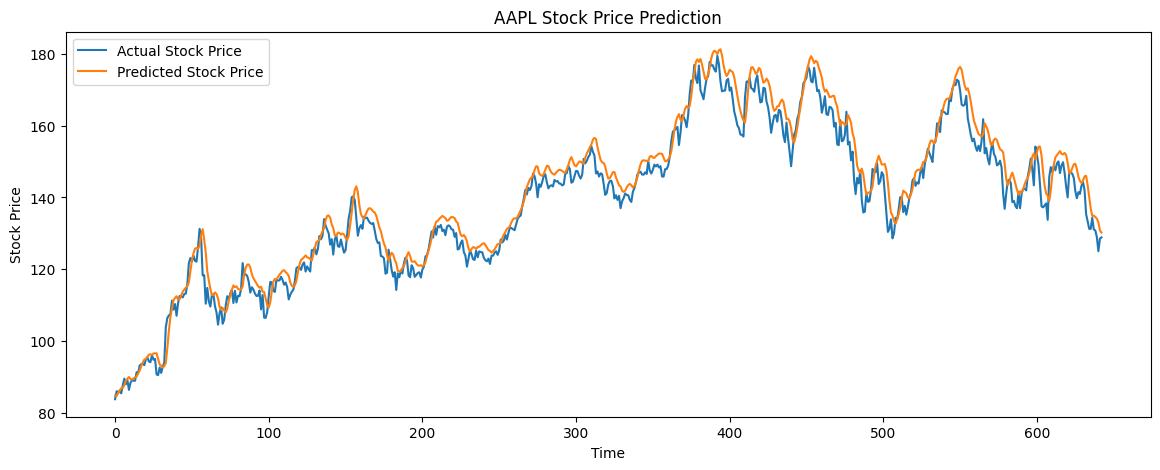

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Download data from Yahoo Finance
ticker_symbol = 'AAPL'  # Example: Apple Inc.
start_date = '2010-01-01'
end_date = '2023-01-01'

data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Use Adjusted Close prices
df = data[['Adj Close']].copy()

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Function to prepare data
def prepare_data(data, look_back):
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Prepare the data with a look-back window
look_back = 60
X, y = prepare_data(scaled_data, look_back)

# Reshape data for LSTM input [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=4, verbose=1)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Inverse transform y_test for evaluation
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(y_test, label='Actual Stock Price')
plt.plot(predictions, label='Predicted Stock Price')
plt.title(f'{ticker_symbol} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
